#Section: Thông tin
1. MSSV: 20520934
2. Họ tên: Bùi Quốc Thịnh
3. Bài tập: Edge detection
4. Ngày thực hiện: 07/03/2022

#Yêu cầu 1
 Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm
cạnh: Gx, Gy và G
– 2 ảnh: Bicycle.jpg và ( bansoxe.jpg hoặc
houseg.bmp)

In [131]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Đặt các đường dẫn cho bài tập

In [132]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.M21.KHCL'

dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

##Đọc và hiển thị ảnh

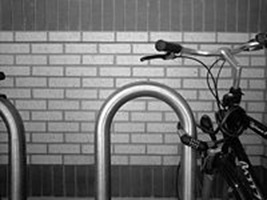

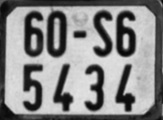

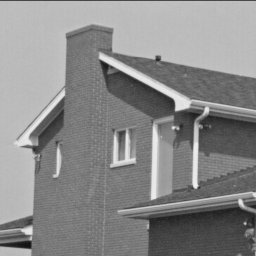

In [133]:
import cv2 as cv
import numpy as np
from scipy import ndimage

path_filename = os.path.join(dir_images, 'Bicycle.jpg')
img = cv.imread(path_filename, 0)

path_filename_2 = os.path.join(dir_images, 'bansoxe.jpg')
img2 = cv.imread(path_filename_2, 0)

path_filename_3 = os.path.join(dir_images, 'houseg.bmp')
img3 = cv.imread(path_filename_3, 0)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(img2)
cv2_imshow(img3)

In [134]:
def sobel_filters(img):
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = cv.filter2D(img, -1, Sx)
    Iy = cv.filter2D(img, -1, Sy)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return Ix, Iy, G, theta

In [135]:
import matplotlib.pyplot as plt

def show2image(img_src, img_rst, title1, title2):
    plt.figure(figsize=(20, 20))

    #show img src
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img_src = cv2.cvtColor(img_src.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img_src, interpolation='bicubic')

    #show img result
    plt.subplot(1, 2, 2)
    plt.title(title2)
    img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img_rst, interpolation='bicubic')

##Hiển thị ảnh kết quả của ảnh Bicycle.jpg

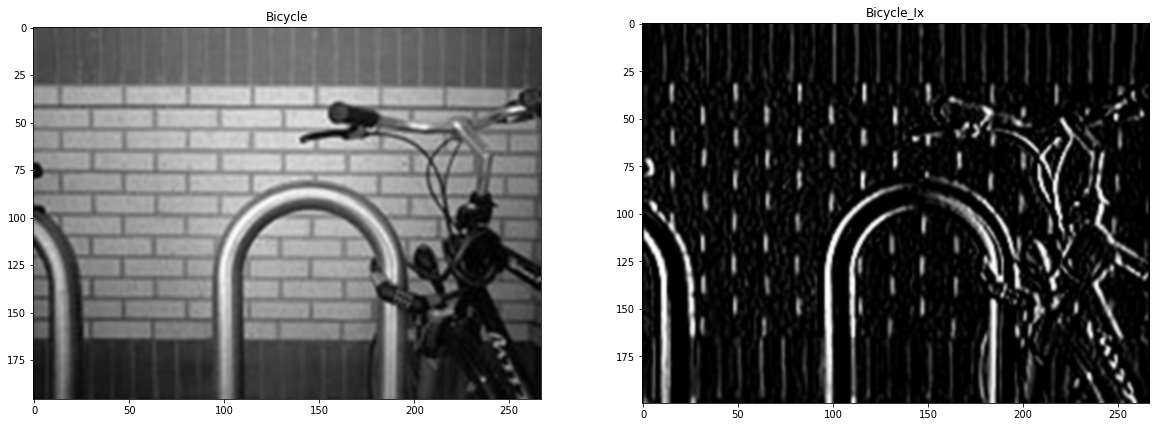

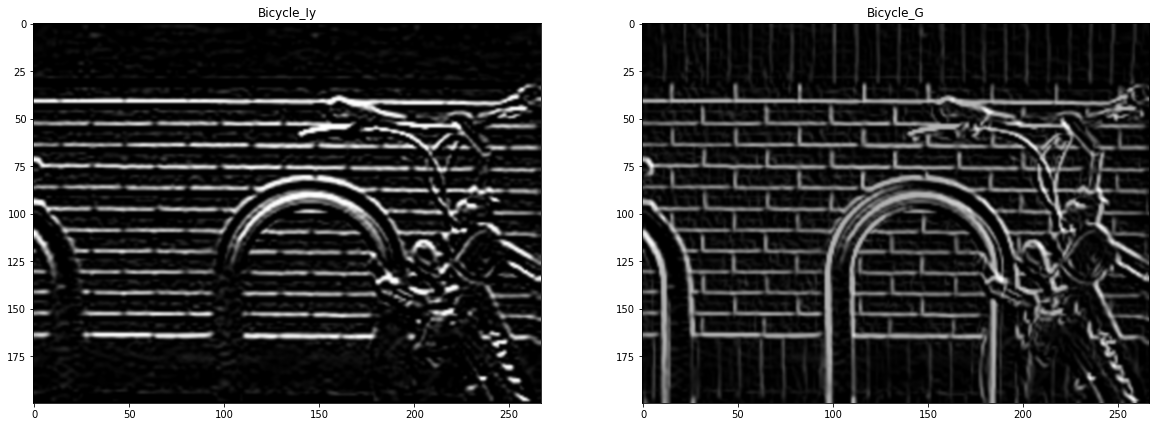

In [136]:
Ix, Iy, G, theta = sobel_filters(img)
img = img[:-4]
show2image(img, Ix, 'Bicycle', 'Bicycle_Ix')
show2image(Iy, G, 'Bicycle' + '_Iy', 'Bicycle_G')

##Hiển thị ảnh kết quả của ảnh bansoxe.jpg

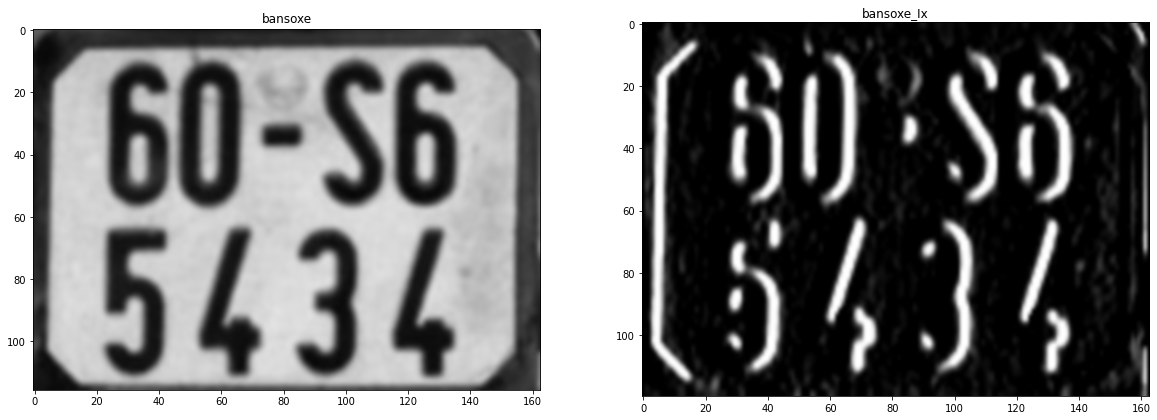

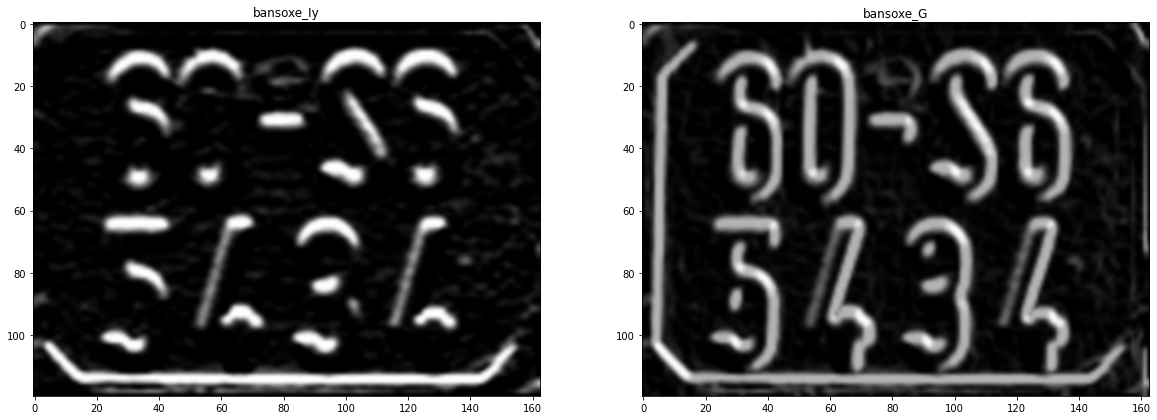

In [137]:
Ix, Iy, G, theta = sobel_filters(img2)
img2 = img2[:-4]
show2image(img2, Ix, 'bansoxe', 'bansoxe_Ix')
show2image(Iy, G, 'bansoxe_Iy', 'bansoxe_G')

##Hiển thị ảnh kết quả của ảnh houseg.jpg

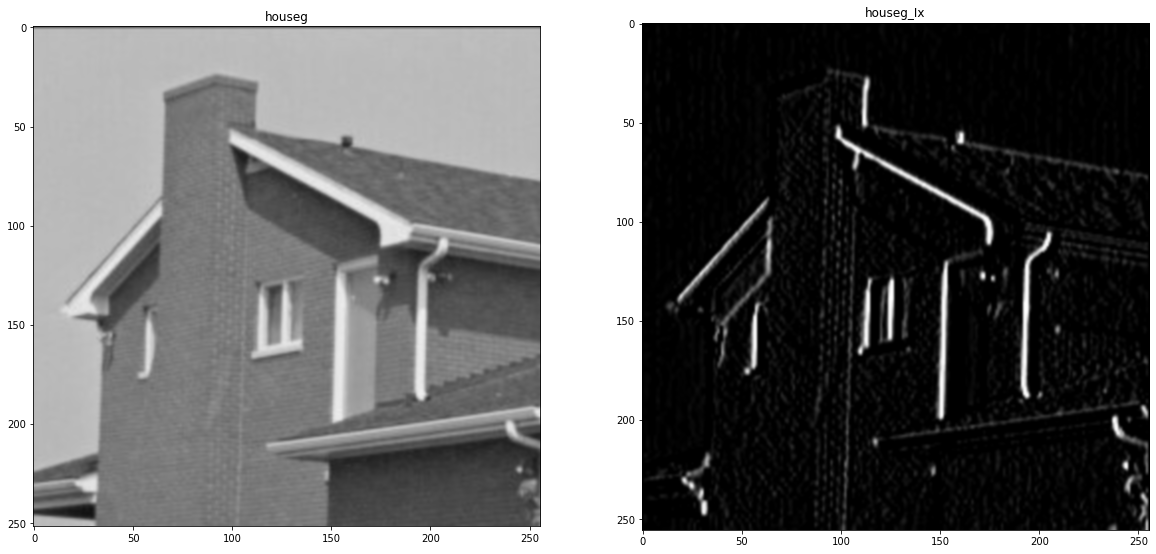

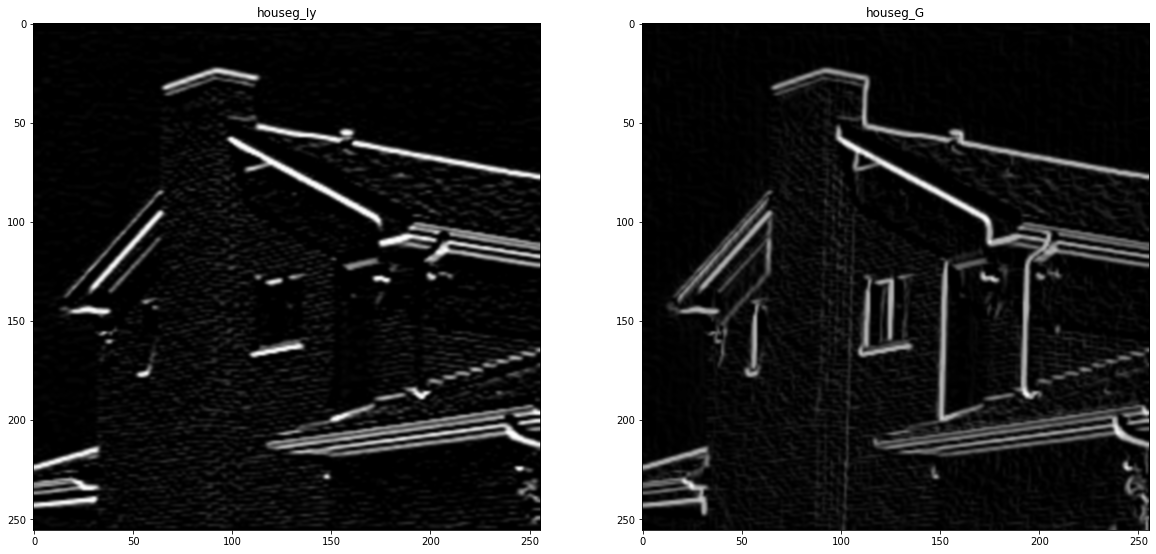

In [138]:
Ix, Iy, G, theta = sobel_filters(img3)
img3 = img3[:-4]
show2image(img3, Ix, 'houseg', 'houseg_Ix')
show2image(Iy, G, 'houseg_Iy', 'houseg_G')

#Yêu cầu 2: 
• Viết hàm xác định đặc trưng ảnh dựa trên thông tin cạnh: theo trục x và trục y

• Tính khoảng cách euclidean giữa 2 ảnh: sử dụng thư viện của scipy

• Tính sự tương đồng theo cosin giữa 2 ảnh.

In [141]:
def calFeartureVector(img_src):
    img_dst = img_src.copy()
    img_dst = cv.resize(img_dst, (256, 256))
    Ix, Iy, G, theta = sobel_filters(img_dst)

    feature = []
    for i in range(G.shape[0]):
        tmp = 0
        for j in range(G.shape[1]):
            tmp = tmp + G[i,j]
        feature.append(tmp)

    for j in range(G.shape[1]):
        tmp = 0
        for i in range(G.shape[0]):
            tmp = tmp + G[i,j]
        feature.append(tmp)
    return feature

In [147]:
from scipy.spatial import distance
from scipy import spatial

img_0814 = cv.imread(os.path.join(dir_images, 'image_0814.jpg'), 0)
img_0816 = cv.imread(os.path.join(dir_images, 'image_0816.jpg'), 0)
feature1 = calFeartureVector(img_0814)
feature2 = calFeartureVector(img_0816)
print('Euclidean distance for <image_0814.jpg, image_0816.jpg> is {}'.format(distance.euclidean(feature1, feature2)))
print('Cosine similarity between <image_0814.jpg, image_0816.jpg> is {}'.format(1 - spatial.distance.cosine(feature1, feature2)))

Euclidean distance for <image_0814.jpg, image_0816.jpg> is 55432.88078311733
Cosine similarity between <image_0814.jpg, image_0816.jpg> is 0.9403013260778476


In [148]:
img_0814 = cv.imread(os.path.join(dir_images, 'image_0814.jpg'), 0)
img_1248 = cv.imread(os.path.join(dir_images, 'image_1248.jpg'), 0)
feature1 = calFeartureVector(img_0814)
feature2 = calFeartureVector(img_1248)
print('Euclidean distance for <image_0814.jpg, image_1248.jpg> is {}'.format(distance.euclidean(feature1, feature2)))
print('Cosine similarity between <image_0814.jpg, image_1248.jpg> is {}'.format(1 - spatial.distance.cosine(feature1, feature2)))

Euclidean distance for <image_0814.jpg, image_1248.jpg> is 92123.37554385341
Cosine similarity between <image_0814.jpg, image_1248.jpg> is 0.8133452847890963
